# Nom

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
mpl.rcParams.update(rcParams)

## Tension résiduelle

Il y a une tension résiduelle parce que dans le contexte du laboratoire il n'y avait pas d'isolement de l'échantillon des champs magnétiques crées par les cables, les bobines, la Terre et toute autre source de champ électromagnétique.

## InP 2µm, configuration $I_{24}, V_{13}$

In [3]:
data1 = pd.read_csv("../data/VInP2micro(B).csv", delimiter=",")
data1

,B [mT],I(in) [mA],U [mV],deltaB,deltaI,deltaU
0,7.15,0.9994,30.615,0.1015,0.001,0.01
1,49.20,1.0005,64.048,0.7920,0.001,0.01
2,97.80,1.0012,104.955,1.2780,0.001,0.01
3,126.10,0.9995,125.518,1.5610,0.001,0.01
4,157.90,0.9991,150.200,1.8790,0.001,0.05
5,191.40,0.9986,178.196,2.2140,0.001,0.05
6,230.10,0.9977,209.644,2.6010,0.001,0.05
7,249.20,0.9969,225.253,2.7920,0.001,0.05
8,269.20,0.9965,241.534,2.9920,0.001,0.05
9,290.20,0.9959,258.574,3.2020,0.001,0.05


In [4]:
B1 = unp.uarray(data1["B [mT]"], data1["deltaB"])
I1 = unp.uarray(data1["I(in) [mA]"], data1["deltaI"])
U1 = unp.uarray(data1["U [mV]"], data1["deltaU"])

In [13]:
data3 = pd.read_csv("../data/VInP1micro(B).csv", delimiter=",")
data3

,B [mT],I(in) [mA],U [mV],deltaB,deltaI,deltaU
0,7.64,1.0019,67.203,0.1064,0.001,0.01
1,52.50,1.0019,167.855,0.8250,0.001,0.01
2,97.50,1.0019,259.109,1.2750,0.001,0.01
3,156.90,1.0019,402.807,1.8690,0.001,0.01
4,207.10,1.0019,515.120,2.3710,0.001,0.01
5,250.60,1.0019,612.300,2.8060,0.001,0.10
6,288.70,1.0019,696.970,3.1870,0.001,0.10
7,335.00,1.0019,796.300,6.3500,0.001,0.10
8,350.00,1.0019,829.360,6.5000,0.001,0.10
9,-5.07,1.0045,38.872,0.0807,0.001,0.01


In [14]:
B2 = unp.uarray(data3["B [mT]"], data3["deltaB"])
I2 = unp.uarray(data3["I(in) [mA]"], data3["deltaI"])
U2 = unp.uarray(data3["U [mV]"], data3["deltaU"])

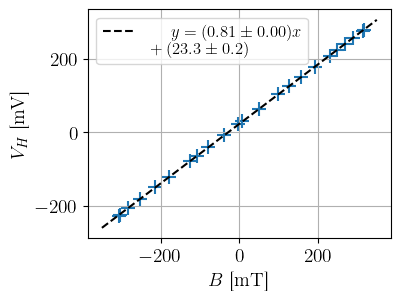

In [5]:
plt.scatter(unp.nominal_values(B1), unp.nominal_values(U1), marker='+')
# plt.errorbar(unp.nominal_values(B), unp.nominal_values(U), xerr=unp.std_devs(B), yerr=unp.std_devs(U))
plt.xlabel(r"$B$ [\si{\milli\tesla}]")
plt.ylabel(r"$V_H$ [\si{\milli\volt}]")

# Fit
coefs, cov = np.polyfit(unp.nominal_values(B1), unp.nominal_values(U1), 1, cov=True)
fit = np.poly1d(coefs)
coefserr = unp.uarray(coefs, np.sqrt(cov[(0,1),(0,1)]))
x = np.linspace(-350, 350, 100)
plt.plot(x, fit(x), '--', label=r"$y = ({:.2fL})x \\+ ({:.1uL})$".format(*coefserr), color='black')

# 1µm
plt.scatter(unp.nominal_values(B), unp.nominal_values(U))
plt.xlabel(r"$B$ [\si{\milli\tesla}]")
plt.ylabel(r"$V_H$ [\si{\milli\volt}]")

# Fit
coefs, cov = np.polyfit(unp.nominal_values(B), unp.nominal_values(U), 1, cov=True)
fit = np.poly1d(coefs)
coefserr = unp.uarray(coefs, np.sqrt(cov[(0,1),(0,1)]))
x = np.linspace(-370, 370, 100)
plt.plot(x, fit(x), '--', label=r"$y = ({:.2fL})x \\+ ({:.1uL})$".format(*coefserr), color='black')


# plt.ticklabel_format(axis='both', style='sci', scilimits=(2,2))
plt.grid()
plt.legend()
plt.tight_layout(pad=0.5)

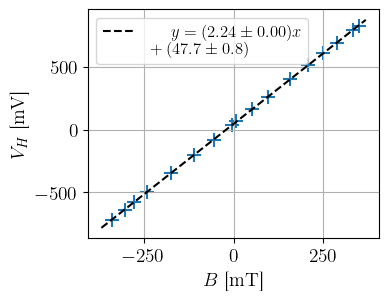

In [19]:

# plt.ticklabel_format(axis='both', style='sci', scilimits=(2,2))
plt.grid()
plt.legend()
plt.tight_layout(pad=0.5)
plt.savefig("../figures/U(B),InP1micro.pdf")